# Playing around a bit

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.dpi"] = 125

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../functions/")

In [5]:
import utils
from analytical import basis_map
from main import predict
from computer_vision import otsu

/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [6]:
TRAIN_PATH = "../data/training/"
TEST_PATH = "../data/testing/"
X_train, Y_train, X_test = utils.load_data(TRAIN_PATH, TEST_PATH)

Getting and resizing train images and masks ... 


100%|██████████| 670/670 [01:45<00:00,  6.38it/s]

Getting and resizing test images ... 



100%|██████████| 65/65 [00:00<00:00, 67.17it/s]

Done!


In [7]:
X_train.shape

(670, 128, 128, 3)

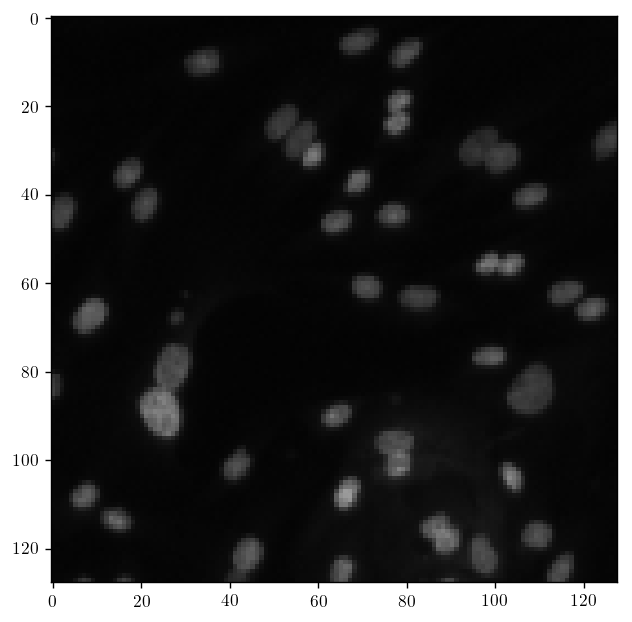

In [11]:
plt.imshow(X_train[0])

(array([ 14521.,      0.,    191.,      0.,    101.,    144.,      0.,
           147.,      0.,   1280.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

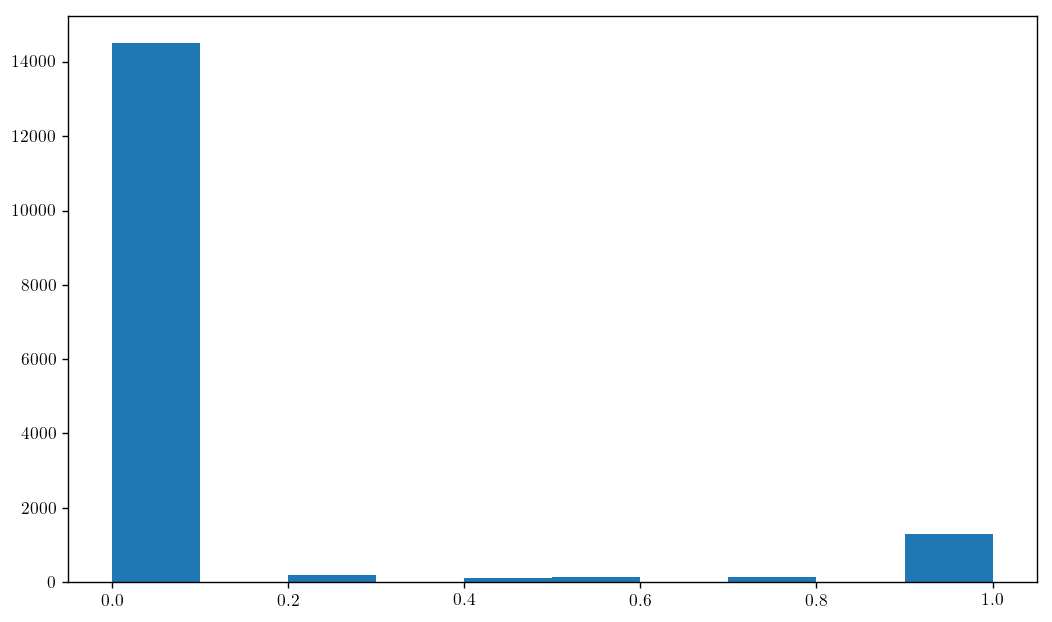

In [12]:
plt.hist(Y_train[0].flatten())

sparse


/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.18.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


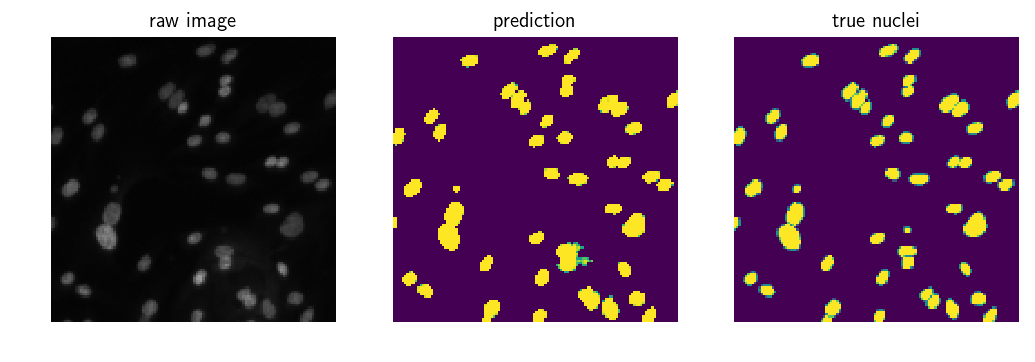

In [13]:
from visualization import viz_prediction

im_num = 0
viz_prediction(X_train[im_num], Y_train[im_num])
plt.show()

In [14]:
from skimage import feature, measure, segmentation
from scipy import ndimage

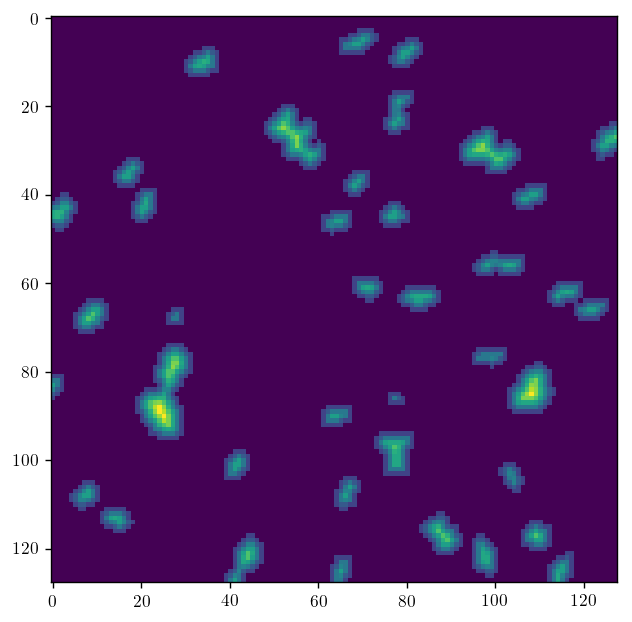

In [16]:
image = Y_train[0]
dt = ndimage.distance_transform_edt(image)
plt.imshow(dt)

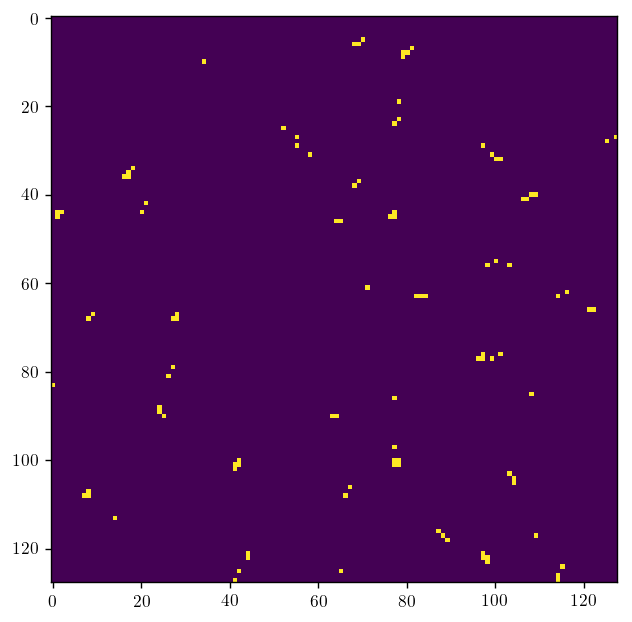

In [17]:
local_peaks = feature.peak_local_max(dt, exclude_border=False, indices=False)
plt.imshow(local_peaks)

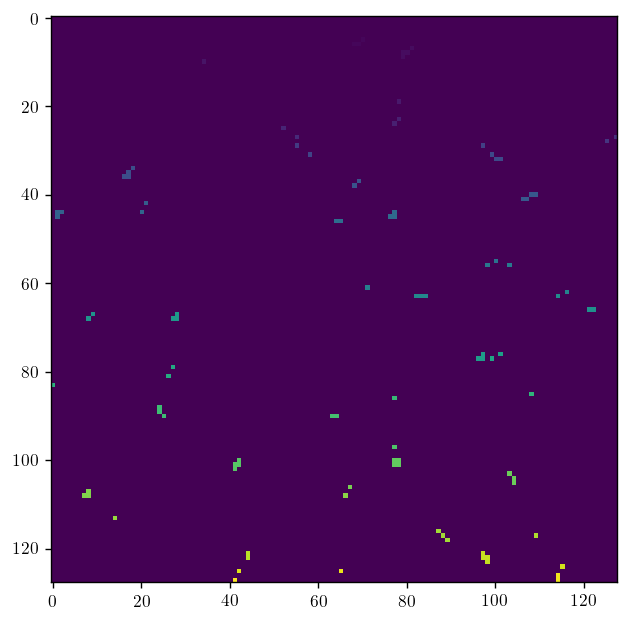

In [18]:
markers = measure.label(local_peaks)

plt.imshow(markers)

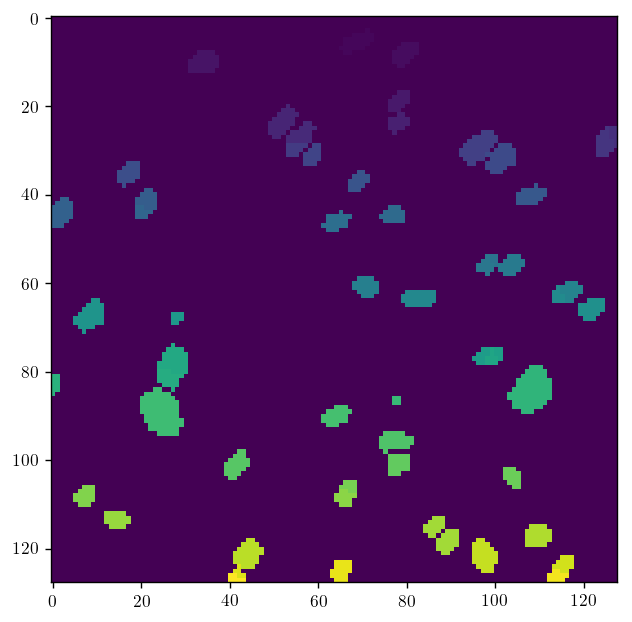

In [19]:
labels_ws = segmentation.watershed(-dt, markers, mask=image)

plt.imshow(labels_ws)

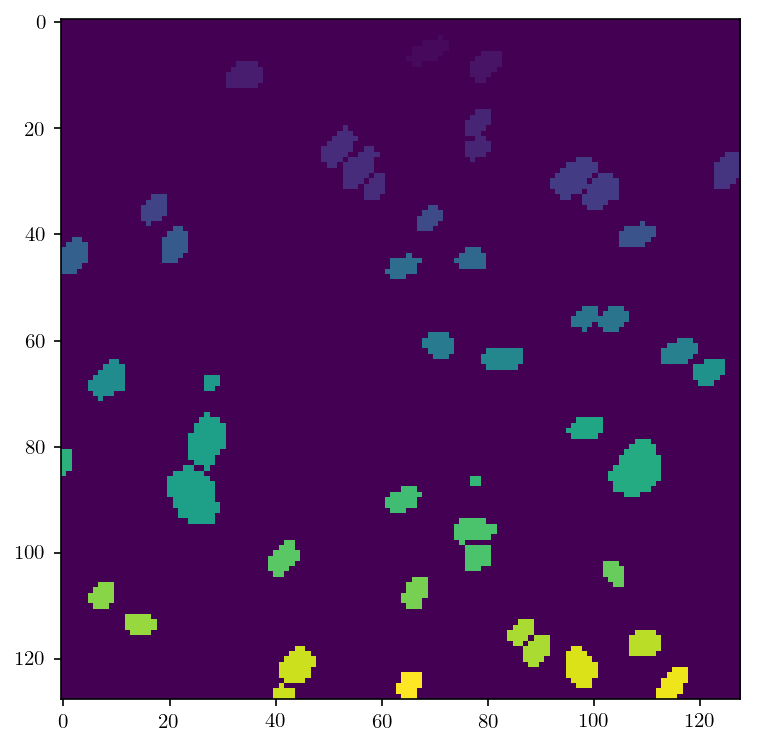

In [61]:
plt.imshow(measure.label(image))

In [21]:
from components import watershed_cc, measure_label_cc

# cc separation

In [27]:
imnum = 0
image = X_train[imnum]
mask = Y_train[imnum]

pred = predict(image)
#ccs_wshed = watershed_cc(pred)

dt = ndimage.distance_transform_edt(pred)
peaks = feature.peak_local_max(dt, exclude_border = False, indices = False)
markers = measure.label(peaks)
seg = segmentation.watershed(-dt, markers, mask = (pred > 0))

sparse


/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.18.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


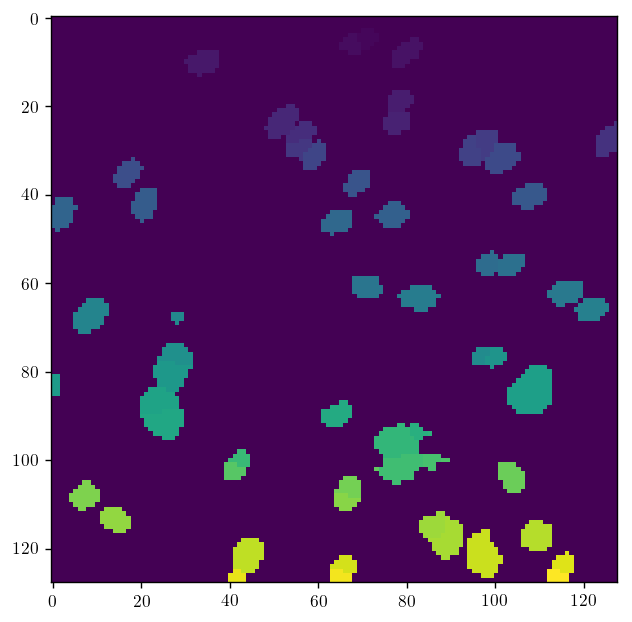

In [28]:
plt.imshow(seg)

sparse


/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.18.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


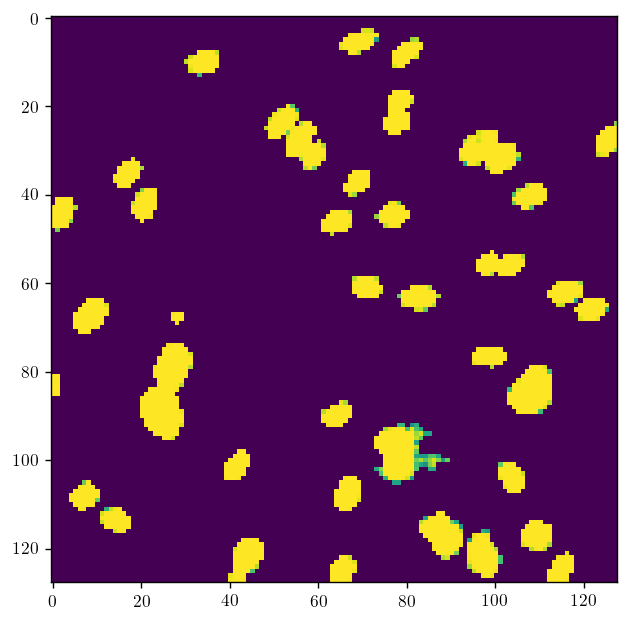

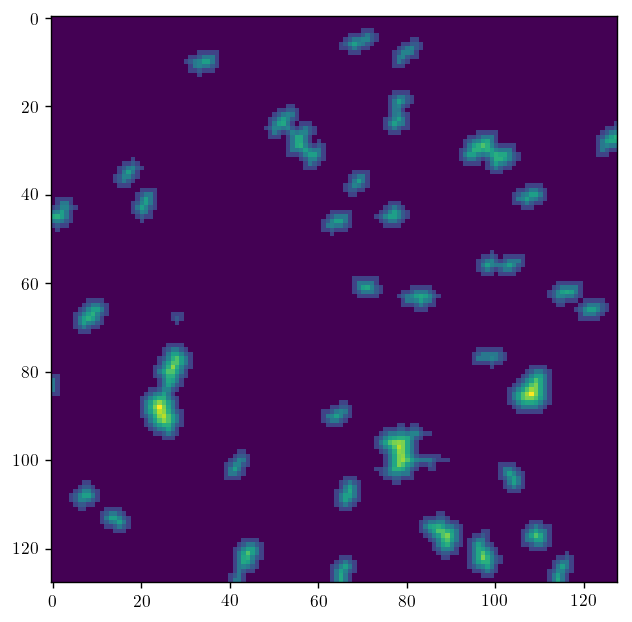

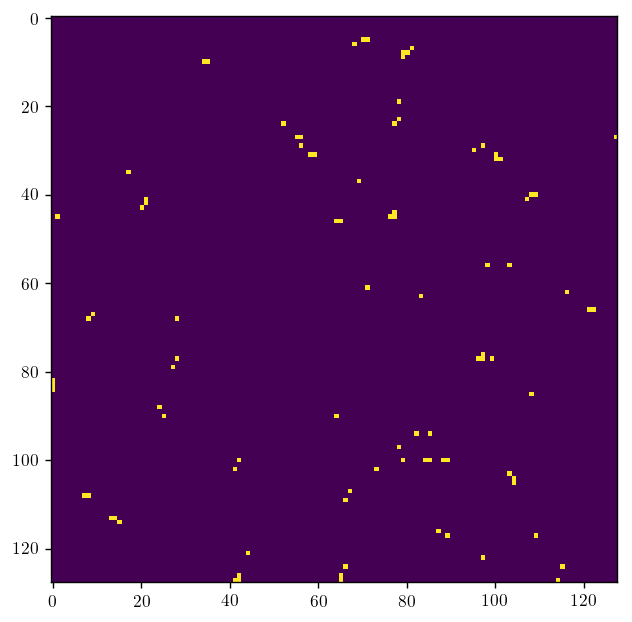

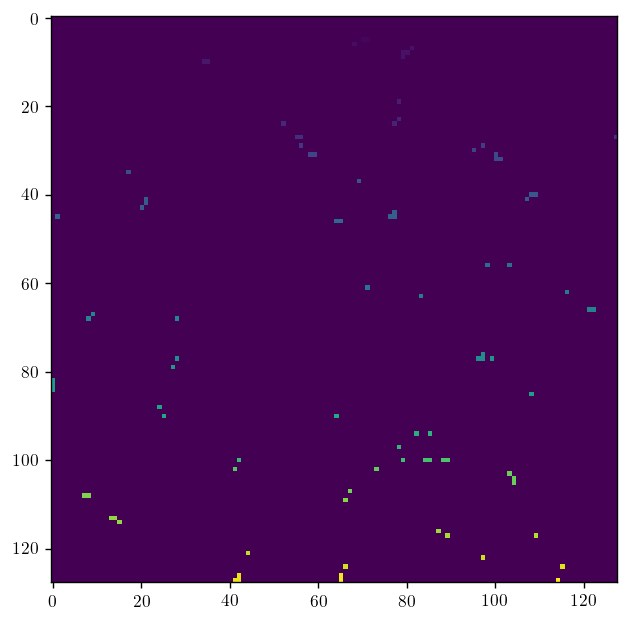

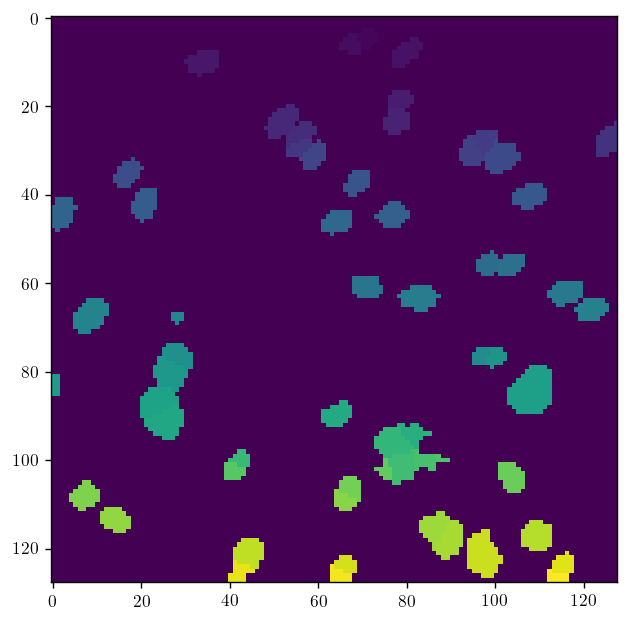

In [24]:
#image = Y_train[0]
image = predict(X_train[0])
plt.imshow(image)
plt.show()

dt = ndimage.distance_transform_edt(image)
plt.imshow(dt)
plt.show()

local_peaks = feature.peak_local_max(dt, exclude_border=False, indices=False)
plt.imshow(local_peaks)
plt.show()

markers = measure.label(local_peaks)

plt.imshow(markers)
plt.show()

labels_ws = segmentation.watershed(-dt, markers, mask=(image > 0), compactness=1)

plt.imshow(labels_ws)
plt.show()

In [39]:
imnum = 0
image = X_train[imnum]
mask = Y_train[imnum]

pred = predict(image)

sparse


/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.18.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


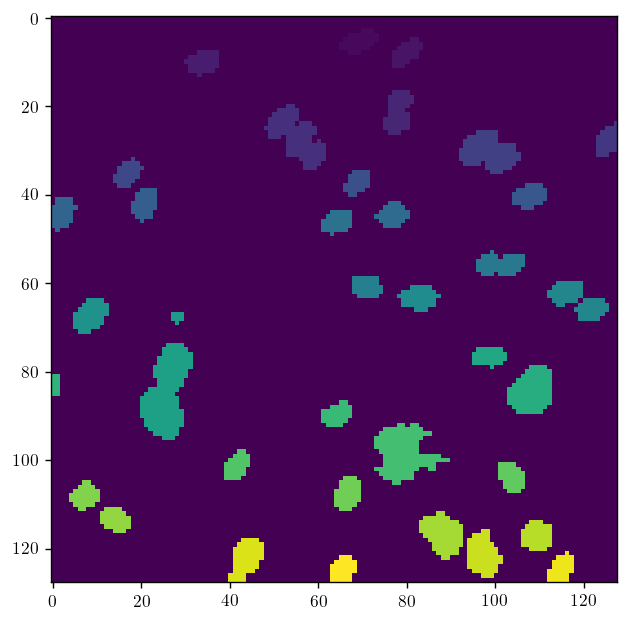

In [40]:
ccs = measure.label(pred > 0.0)
plt.imshow(ccs)

# rl encoding 

In [99]:
mask = np.array(
    [[1, 0, 0, 0],
     [0, 1, 1, 0],
     [0, 0, 0, 1],
     [1, 1, 0, 0]]
)
flat_mask = mask.flatten()

correct_rle = [(1, 1), (6, 2), (12, 3)]

In [74]:
flat_mask

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [87]:
nonzero_ind  = np.nonzero(flat_mask)[0]

nonzero_ind

array([ 0,  5,  6, 11, 12, 13])

In [88]:
diff = np.diff(nonzero_ind)
diff

array([5, 1, 5, 1, 1])

The guy below me indicates which differences are not 1, indicating we have a new value at this index.  Note that this necessarily excludes the first original nonzero value in the mask, so the first value here is actually indicating the start of the second run.  The length of this guy is the (# of runs we'll have) - 1.

In [94]:
runstarts = np.hstack([[0], np.nonzero(diff != 1)[0] + 1])
runstarts

array([0, 1, 3])

In [98]:
rle = [(1 + nonzero_ind[runstarts[i]], runstarts[i + 1] - runstarts[i]) for i in range(len(runstarts) - 1)]
rle += [(1 + nonzero_ind[runstarts[-1]], len(nonzero_ind) - runstarts[-1])]
rle

[(1, 1), (6, 2), (12, 3)]

In [100]:
from submission import encode_rle_single_mask

In [104]:
rle_encoding = encode_rle_single_mask(Y_train[0] > 0)

In [106]:
rebuilt_mask = np.zeros_like(Y_train[0]).flatten()

for tup in rle_encoding:
    true_ind = tup[0] - 1
    rebuilt_mask[true_ind:(true_ind + tup[1])] = 1
    
rebuilt_mask = rebuilt_mask.reshape(Y_train[0].shape)

In [108]:
np.allclose(rebuilt_mask, (Y_train[0] > 0))

True

In [114]:
mask.flatten(order = 'F')

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [115]:
mask.flatten()

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [116]:
encode_rle_single_mask(mask)

[(1, 1), (4, 1), (6, 1), (8, 1), (10, 1), (15, 1)]